## Welcome to Vizuara AI Labs Regression Assessment

This assignment has been crafted with a lot of care and passion. We hope you enjoy the challenge and **learn a lot** from it! Best of luck, and we look forward to seeing your submission.


==============================================================================

**⭐Regression**

Build a linear regression model using the Pune Housing dataset. Here is where you can find the dataset: https://drive.google.com/file/d/151s9UaTL88G2FR-ffHt76FNe1oWaHEbF/view?usp=sharing

**Instructions:**
Your aim is to load the data, explore the data, preprocess the data, build and evaluate a regression model.

In [1]:
import pandas as pd

url = "https://drive.google.com/uc?id=151s9UaTL88G2FR-ffHt76FNe1oWaHEbF"
df = pd.read_csv(url)
print(df.shape)
df.head()

(13320, 9)


,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [2]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


,0
area_type,0
availability,0
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0
site_location,1


In [3]:
df = df.dropna(subset=['price'])
df = df.fillna(method='ffill')
df = pd.get_dummies(df, drop_first=True)

/tmp/ipython-input-3-4109428238.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("price", axis=1)
y = df["price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

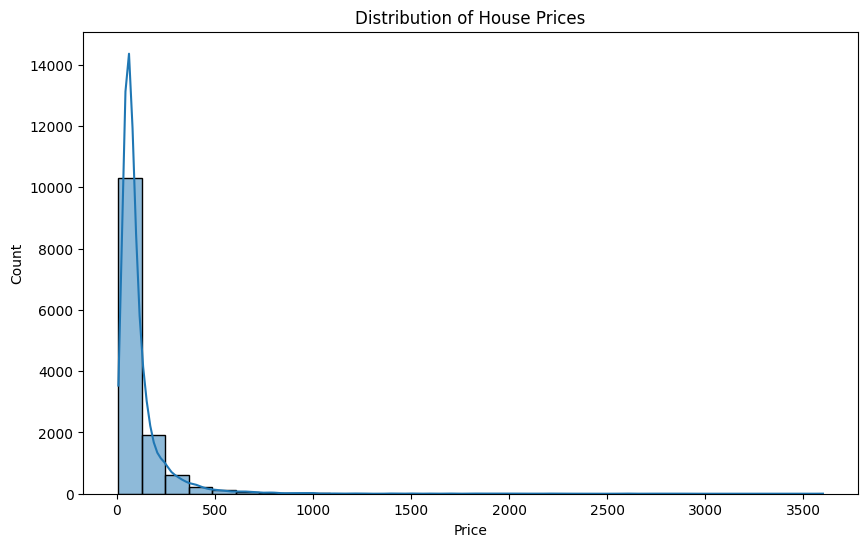

In [5]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [11]:
# Build and evaluate Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [13]:
print("Training accuracy: ",train_r2)
print("Testing accuracy: ",test_r2)

Training accuracy:  0.8632561408797752
Testing accuracy:  0.20497271901528435


In [14]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])
ridge.fit(X_train, y_train)

RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])

In [15]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training accuracy: ",train_r2)
print("Testing accuracy: ",test_r2)

Training accuracy:  0.8632328492294615
Testing accuracy:  0.2837605720612171


**Observations**
- The power of preprocessing: even simple models can perform well if data is cleaned and prepped.
- Visualization uncovers hidden structure (especially correlation patterns).
- Feature engineering is key: irrelevant columns add noise more than insight.
